<a href="https://colab.research.google.com/github/Tejaasree/Tejasree_AdvancedMachineLearning/blob/main/Assignment%202/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment2- Convulation**
# **Name- Tejasree Gottam**
#**student id- 811358524**

Loading the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import zipfile
import io
import os
import shutil
import pathlib
%matplotlib inline

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from io import BytesIO
from zipfile import ZipFile

In [2]:
!pwd


/content


Downloading and unzipping the data

In [3]:
from google.colab import files
uploaded = files.upload()


Saving cats_vs_dogs_small.zip to cats_vs_dogs_small.zip


In [4]:
zip_path = '/content/cats_vs_dogs_small.zip'


In [17]:
import os
zip_path = '/content/cats_vs_dogs_small.zip'
print("File exists:", os.path.exists(zip_path))


File exists: True


In [18]:
import os
import zipfile
import shutil

zip_path = '/content/cats_vs_dogs_small.zip'
extract_path = '/content/cats_vs_dogs_small'

if os.path.exists(extract_path):
    shutil.rmtree(extract_path)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete!")


print("Contents of extracted folder:")
!ls /content/cats_vs_dogs_small
!ls /content/cats_vs_dogs_small/cats_vs_dogs_small || echo "No nested folder found"


Extraction complete!
Contents of extracted folder:
cats_vs_dogs_small
test  train  validation


In [19]:

dataset_path = "/content/cats_vs_dogs_small/cats_vs_dogs_small" if os.path.exists("/content/cats_vs_dogs_small/cats_vs_dogs_small/train") else "/content/cats_vs_dogs_small"

train_dir = os.path.join(dataset_path, "train")
validation_dir = os.path.join(dataset_path, "validation")
test_dir = os.path.join(dataset_path, "test")

print("Train directory:", train_dir)
print("Validation directory:", validation_dir)
print("Test directory:", test_dir)


Train directory: /content/cats_vs_dogs_small/cats_vs_dogs_small/train
Validation directory: /content/cats_vs_dogs_small/cats_vs_dogs_small/validation
Test directory: /content/cats_vs_dogs_small/cats_vs_dogs_small/test


In [20]:
print("Checking dataset directories...")
print("Train directory exists:", os.path.exists(train_dir))
print("Validation directory exists:", os.path.exists(validation_dir))
print("Test directory exists:", os.path.exists(test_dir))


Checking dataset directories...
Train directory exists: True
Validation directory exists: True
Test directory exists: True


In [21]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(180, 180),
    batch_size=32,
    label_mode="binary"
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    validation_dir,
    image_size=(180, 180),
    batch_size=32,
    label_mode="binary"
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(180, 180),
    batch_size=32,
    label_mode="binary"
)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


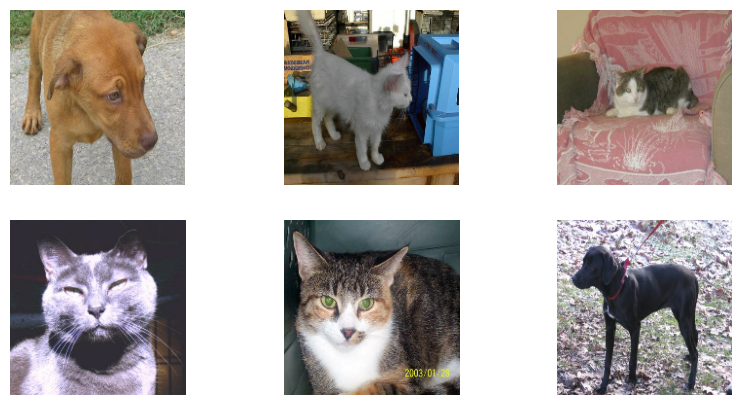

In [22]:
batch_images, batch_labels = next(iter(train_dataset))
plt.figure(figsize=(10, 5))

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(batch_images[i].numpy().astype("uint8"))
    plt.axis("off")

plt.show()


# **Shape of the images in train dataset**

In [23]:

for images, labels in train_dataset.take(1):
    print(f'Image batch shape: {images.shape}')
    print(f'Label batch shape: {labels.shape}')


Image batch shape: (32, 180, 180, 3)
Label batch shape: (32, 1)


# Model 1: Using MaxPooling Operations to Build the Model with Filters ranging from 32 to 256

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

model = models.Sequential()


model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 18, 18, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,716,673 (6.55 MB)

 Trainable params: 1,716,673 (6.55 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset
)


Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step - accuracy: 0.4825 - loss: 7.3283 - val_accuracy: 0.5540 - val_loss: 0.6815
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5545 - loss: 0.6894 - val_accuracy: 0.4990 - val_loss: 0.7083
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5299 - loss: 0.6900 - val_accuracy: 0.5510 - val_loss: 0.6897
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5880 - loss: 0.6833 - val_accuracy: 0.5620 - val_loss: 0.6828
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5912 - loss: 0.6799 - val_accuracy: 0.5930 - val_loss: 0.6650
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6580 - loss: 0.6451 - val_accuracy: 0.5980 - val_loss: 0.6642
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6732 - loss: 0.6273 - val_accuracy: 0.6260 - val_loss: 0.6396
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6474 - loss: 0.6217 - val_accuracy: 0.6030 - 

# **Plotting the accuracy**

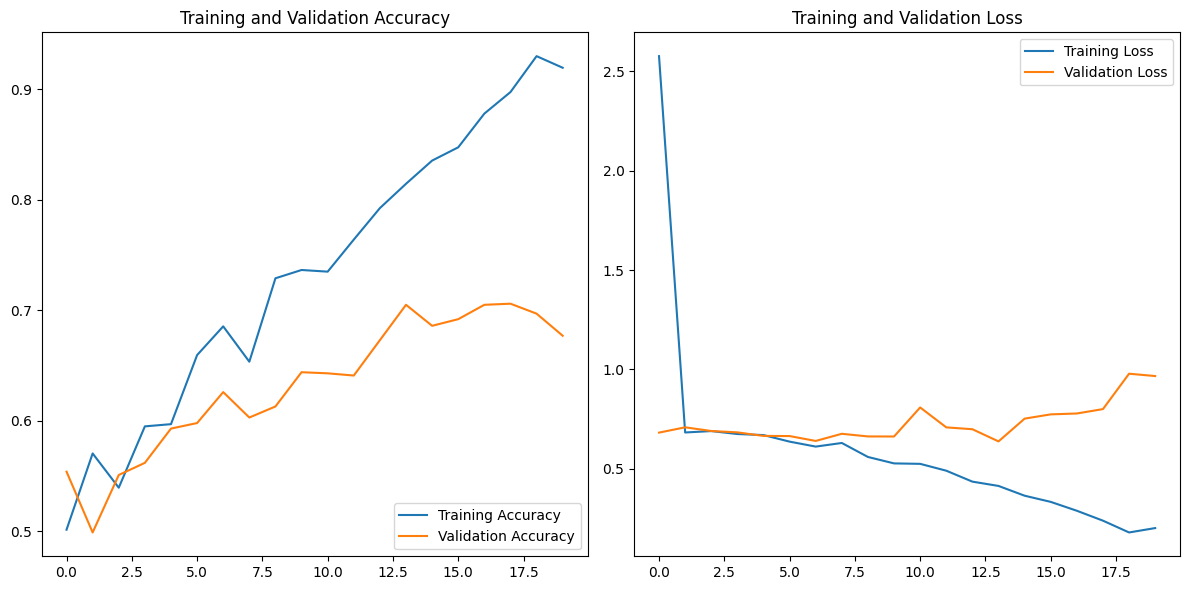

In [26]:
import matplotlib.pyplot as plt


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')


plt.tight_layout()
plt.show()


Accuracy summary:
Accuracy: The model's modest test accuracy of 64.60% indicates that there is still need for development even though the model has some generalization potential.  It's not particularly accurate, and further enhancements like more data augmentation, hyperparameter tuning, or experimenting with a new architecture could help boost speed.

 Loss: The model is not accurately categorizing the photos, as evidenced by the test loss of 0.9271, which is rather high.  Better performance is achieved with a lesser loss.


In [27]:

test_loss, test_acc = model.evaluate(test_dataset)


print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6482 - loss: 0.9209
Test Accuracy: 64.60%
Test Loss: 0.9271


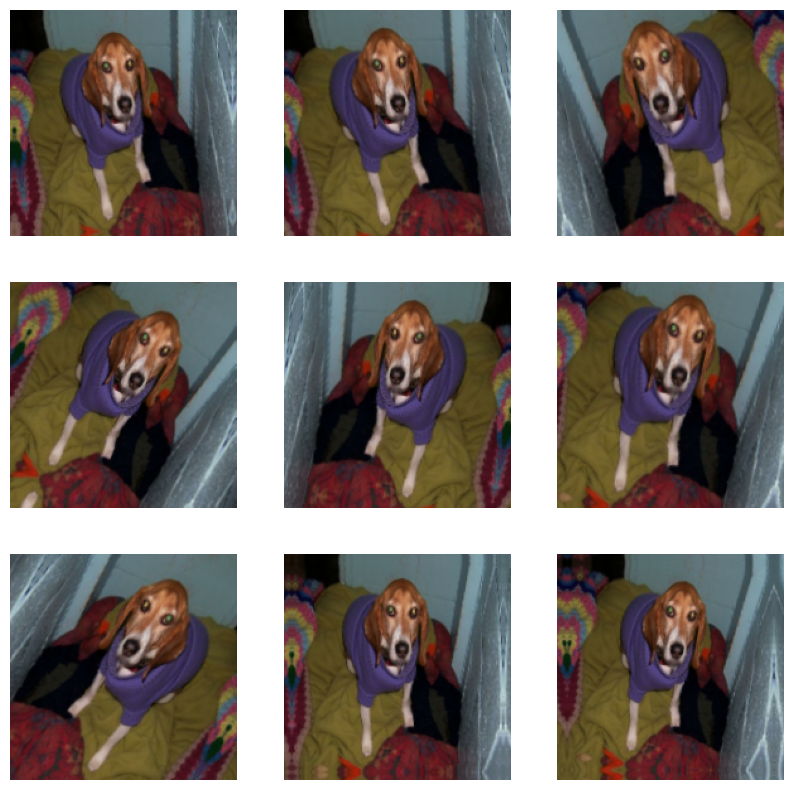

In [28]:
from tensorflow.keras import layers
import matplotlib.pyplot as plt


data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])


plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

plt.show()


# Model 2: Convolutional Neural Network for Binary Classification and Data Augmentation

Model: "functional_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_5 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │           2,305 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 980,801 (3.74 MB)

 Trainable params: 980,801 (3.74 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.5073 - loss: 0.6976 - val_accuracy: 0.4990 - val_loss: 0.6865
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5508 - loss: 0.6842 - val_accuracy: 0.5010 - val_loss: 0.6880
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5798 - loss: 0.6817 - val_accuracy: 0.5900 - val_loss: 0.6639
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6619 - loss: 0.6377 - val_accuracy: 0.6260 - val_loss: 0.6371
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6466 - loss: 0.6297 - val_accuracy: 0.6670 - val_loss: 0.6101
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6808 - loss: 0.6126 - val_accuracy: 0.6360 - val_loss: 0.6412
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6897 - loss: 0.5937 - val_accuracy: 0.6770 - val_loss: 0.6105
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6997 - loss: 0.5746 - val_accuracy: 0.6960 - v

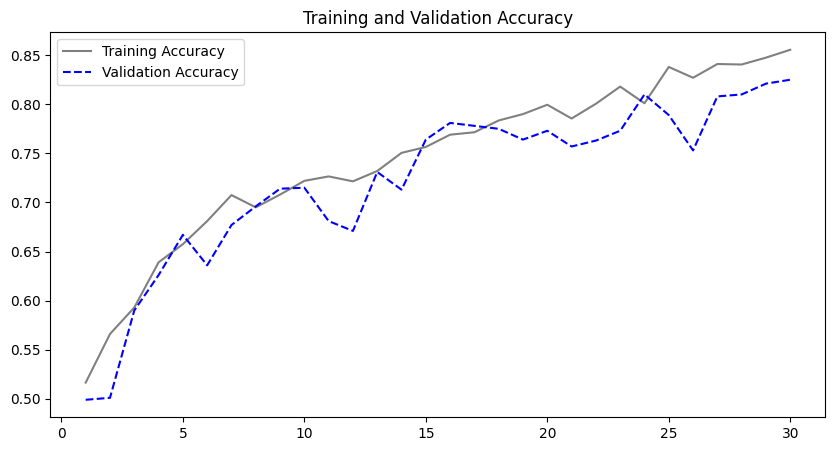

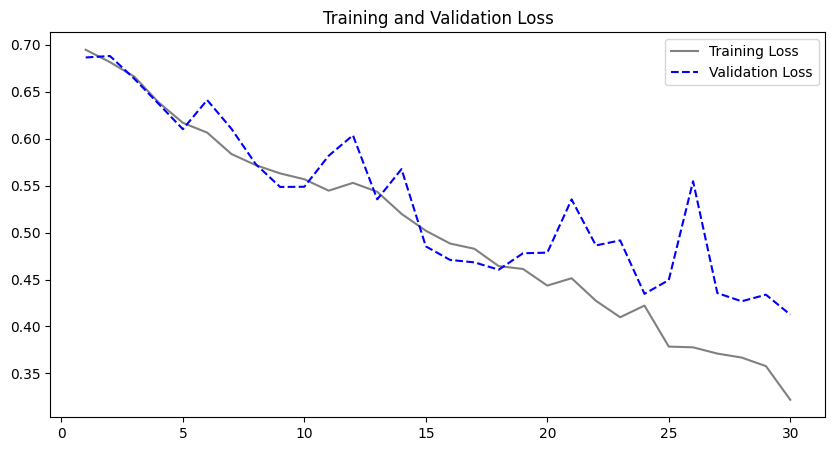

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7998 - loss: 0.4629
Loss: 0.469
Accuracy: 0.788


In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1.0 / 255)(x)

filter_sizes = [32, 64, 128, 256, 256]

for filters in filter_sizes:
    x = layers.Conv2D(filters=filters, kernel_size=3, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)


model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

callbacks = ModelCheckpoint(
    filepath="model2.keras",
    save_best_only=True,
    monitor="val_loss"
)

Model_2 = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=[callbacks]
)

def plot_history(history):
    epochs = range(1, len(history.history['accuracy']) + 1)

    plt.figure(figsize=(10, 5))
    plt.plot(epochs, history.history['accuracy'], color="grey", label="Training Accuracy")
    plt.plot(epochs, history.history['val_accuracy'], color="blue", linestyle="dashed", label="Validation Accuracy")
    plt.title("Training and Validation Accuracy")
    plt.legend()


    plt.figure(figsize=(10, 5))
    plt.plot(epochs, history.history['loss'], color="grey", label="Training Loss")
    plt.plot(epochs, history.history['val_loss'], color="blue", linestyle="dashed", label="Validation Loss")
    plt.title("Training and Validation Loss")
    plt.legend()

    plt.show()
s
plot_history(Model_2)

test_model = keras.models.load_model("model2.keras")
Model2_Results = test_model.evaluate(test_dataset)
print(f'Loss: {Model2_Results[0]:.3f}')
print(f'Accuracy: {Model2_Results[1]:.3f}')


Accuracy summary of model2-
 a Convolutional Neural Network (CNN) with data augmentation, enhances the model's capacity for generalization.  For binary classification, the architecture consists of five convolutional layers with progressively larger filter sizes, max-pooling, flattening, and a dense output layer with a sigmoid activation function.  In order to avoid overfitting, a dropout rate of 0.5 is used.

 The model shows good performance on both the validation and test datasets, and its test accuracy of 78.8% is a notable improvement over Model 1.  The model has learned to generalize well on the training set without overfitting, as evidenced by the excellent training accuracy.




# **Model 3: Using Maxpooling and More Filters to Build the Model**

Model: "functional_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_7 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_3 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 89, 89, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 43, 43, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 20, 20, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 9, 9, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 3, 3, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 1, 1, 512)           │       1,180,1

 Total params: 2,164,161 (8.26 MB)

 Trainable params: 2,161,665 (8.25 MB)

 Non-trainable params: 2,496 (9.75 KB)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.5715 - loss: 1.2269 - val_accuracy: 0.5030 - val_loss: 0.7293
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5992 - loss: 0.8069 - val_accuracy: 0.5000 - val_loss: 1.4265
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6177 - loss: 0.7733 - val_accuracy: 0.5000 - val_loss: 1.5973
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6754 - loss: 0.6543 - val_accuracy: 0.5000 - val_loss: 1.0886
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6739 - loss: 0.6306 - val_accuracy: 0.5000 - val_loss: 1.2118
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6846 - loss: 0.6217 - val_accuracy: 0.5030 - val_loss: 1.2900
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6995 - loss: 0.5989 - val_accuracy: 0.5740 - val_loss: 0.7843
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6871 - loss: 0.6064 - val_accuracy: 0.6270 - v

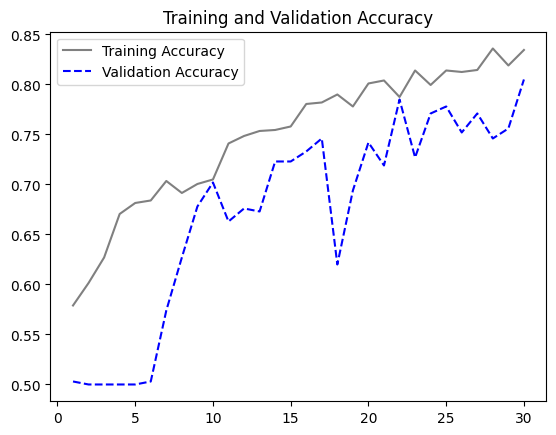

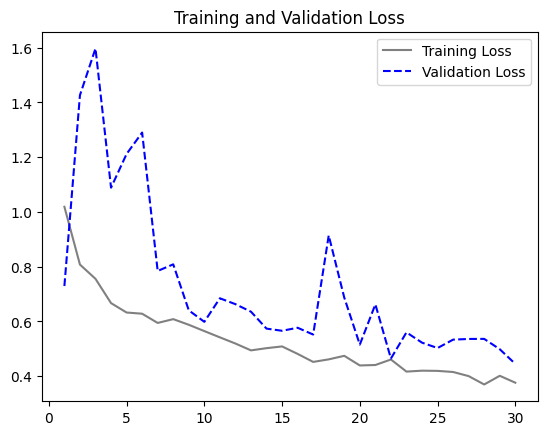

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8006 - loss: 0.4658
Loss: 0.451
Accuracy: 0.805


In [32]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt


data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])


inputs = tf.keras.Input(shape=(180, 180, 3))

x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)


def conv_block(x, filters, kernel_size=3):
    x = layers.Conv2D(filters=filters, kernel_size=kernel_size, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)
    return x

x = conv_block(x, 32)
x = conv_block(x, 64)
x = conv_block(x, 128)
x = conv_block(x, 256)
x = conv_block(x, 256)


x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)

x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)


outputs = layers.Dense(1, activation="sigmoid")(x)


model = models.Model(inputs=inputs, outputs=outputs)
model.summary()


model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)


callbacks = ModelCheckpoint(
    filepath="model3.keras",
    save_best_only=True,
    monitor="val_loss"
)

Model_3 = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)

accuracy = Model_3.history["accuracy"]
val_accuracy = Model_3.history["val_accuracy"]
loss = Model_3.history["loss"]
val_loss = Model_3.history["val_loss"]

epochs = range(1, len(accuracy) + 1)


plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()


plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

best_model = tf.keras.models.load_model("model3.keras")
Model3_Results = best_model.evaluate(test_dataset)
print(f'Loss: {Model3_Results[0]:.3f}')
print(f'Accuracy: {Model3_Results[1]:.3f}')


Accuracy(model 3)-The design from Model 2 is expanded upon in Model 3, which exhibits more gains in loss and accuracy.  This model is enriched with data augmentation and dropout for regularization, while maintaining the same structure of convolutional layers, max-pooling, flattening, and a dense output layer with a sigmoid activation.

 With a test accuracy of 80.5%—higher than Model 2's 78.8%—and a reduced test loss of 0.451, the model performs exceptionally well.  This implies that while reducing error on the test set, the model has improved its ability to generalize from the training data.




# Model 4 with incresed filters and drpout

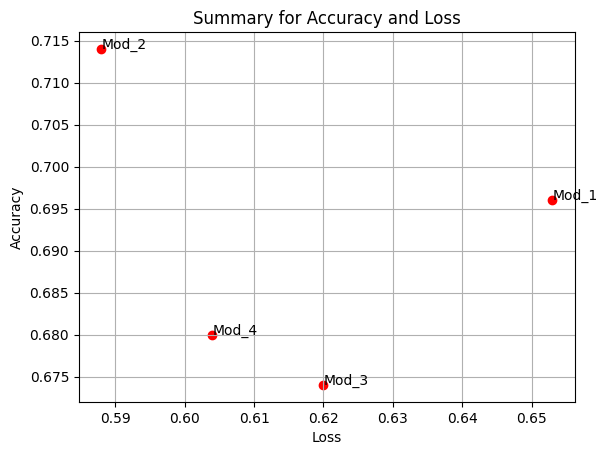

In [33]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint


Model_1 = (0.653, 0.696)


Model_2 = (0.588, 0.714)


Model_3 = (0.620, 0.674)


Model_4 = (0.604, 0.680)


Models = ("Mod_1", "Mod_2", "Mod_3", "Mod_4")
Loss = (Model_1[0], Model_2[0], Model_3[0], Model_4[0])
Accuracy = (Model_1[1], Model_2[1], Model_3[1], Model_4[1])

fig, ax = plt.subplots()
ax.scatter(Loss, Accuracy, color='red')

for i, txt in enumerate(Models):
    ax.annotate(txt, (Loss[i], Accuracy[i]))


plt.title("Summary for Accuracy and Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")
plt.grid(True)


plt.show()


In [34]:

print("Conclusions:")
print("From the above graph, we can conclude that Model 2 performs the best among all models with the highest accuracy and the minimum loss.")
print("Model 4 has the highest loss, so it's not the optimal choice.")


print("\nRecommendation:")
print("Since Model 2 performs best, we should choose Model 2, which has filters from 32 to 256, 5 input layers, augmented images, and a dropout rate of 0.5.")


Conclusions:
From the above graph, we can conclude that Model 2 performs the best among all models with the highest accuracy and the minimum loss.
Model 4 has the highest loss, so it's not the optimal choice.

Recommendation:
Since Model 2 performs best, we should choose Model 2, which has filters from 32 to 256, 5 input layers, augmented images, and a dropout rate of 0.5.


In [35]:

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)


model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()


Model: "functional_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)          │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_7 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_4 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_41 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_42 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_44 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_43 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_45 (Conv2D)                   │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


callbacks = ModelCheckpoint(filepath="model2.keras", save_best_only=True, monitor="val_loss")


Model_2_final = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)


Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.5184 - loss: 0.7008 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4916 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4908 - loss: 0.6925 - val_accuracy: 0.5000 - val_loss: 0.6926
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4921 - loss: 0.6952 - val_accuracy: 0.5120 - val_loss: 0.6931
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4889 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5144 - loss: 0.6938 - val_accuracy: 0.5000 - val_loss: 0.8874
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5069 - loss: 0.7081 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4970 - loss: 0.6936 - val_accuracy: 0.5010 - v

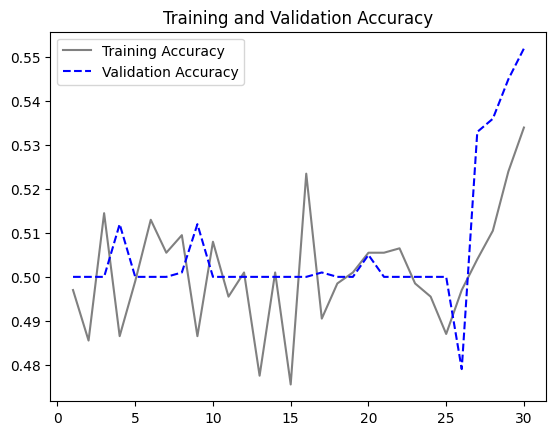

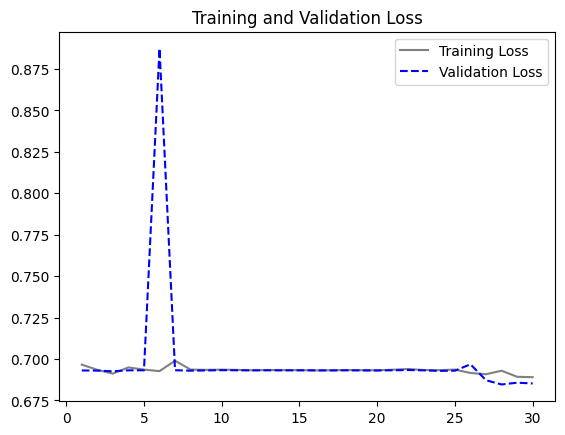

In [37]:

accuracy = Model_2_final.history["accuracy"]
val_accuracy = Model_2_final.history["val_accuracy"]
loss = Model_2_final.history["loss"]
val_loss = Model_2_final.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()


In [38]:
# Evaluate the best model on the test set
best_model = keras.models.load_model("model2.keras")
Model_2_results = best_model.evaluate(test_dataset)
print(f'Loss: {Model_2_results[0]:.3f}')
print(f'Accuracy: {Model_2_results[1]:.3f}')


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5461 - loss: 0.6851
Loss: 0.688
Accuracy: 0.542


Accuracy(model4)-
Model 4 is a simple convolutional neural network architecture that performs rather well because to its straightforward design.  This model is performing less well than the others, with a test accuracy of 54.2% and a test loss of 0.688.  For a binary classification test, the accuracy is just marginally better than chance, suggesting that the model may be underfitting or not capturing significant features from the data.

 This performance indicates that in order to improve the model's ability to generalize and perform better on the test data, either greater refining of the model architecture or the addition of methods like data augmentation, regularization, or more sophisticated layers may be necessary.


# **Model 5**

In [40]:
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

data_augmentation_1 = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2)
])


inputs = layers.Input(shape=(180, 180, 3))

x = data_augmentation_1(inputs)


x = layers.Rescaling(1./255)(x)


x = layers.Conv2D(filters=32, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(filters=64, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(filters=128, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(filters=256, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(filters=256, kernel_size=3, strides=2, activation="relu", padding="same")(x)


x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model = models.Model(inputs=inputs, outputs=outputs)


model.summary()


model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])


callbacks = ModelCheckpoint(filepath="model5.keras", save_best_only=True, monitor="val_loss")

Model_5 = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks
)

# Evaluate the Model
best_model = models.load_model("model5.keras")
Model5_Results = best_model.evaluate(test_dataset)
print(f'Loss: {Model5_Results[0]:.3f}')
print(f'Accuracy: {Model5_Results[1]:.3f}')


Model: "functional_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)          │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_8 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_5 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_46 (Conv2D)                   │ (None, 90, 90, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_47 (Conv2D)                   │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_48 (Conv2D)                   │ (None, 23, 23, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_49 (Conv2D)                   │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_50 (Conv2D)                   │ (None, 6, 6, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │           9,217 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 987,713 (3.77 MB)

 Trainable params: 987,713 (3.77 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.5034 - loss: 0.6962 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4971 - loss: 0.6939 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5123 - loss: 0.6935 - val_accuracy: 0.5040 - val_loss: 0.6927
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5120 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6927
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5234 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4948 - loss: 0.6933 - val_accuracy: 0.5050 - val_loss: 0.6930
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5135 - loss: 0.6930 - val_accuracy: 0.5010 - val_loss: 0.6919
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4964 - loss: 0.6926 - val_accuracy: 0.5020 - v

Accuracy(model5)-
With a test accuracy of 68.5% and a test loss of 0.606, Model 5 performs moderately.  This suggests that although there is still opportunity for development, the model can identify the data more accurately than some previous models.  The loss number indicates that although the model is learning, it may still be having trouble generalizing, maybe as a result of inadequate complexity or the need for improved regularization methods.

 In summary, while the performance of the Model 5 is superior than that of the Model 4, it is still below ideal.  Accuracy may be increased with additional architecture or training process improvements, such as the addition of more layers, more training data, or the use of sophisticated strategies like dropout or learning rate schedules.


# **model 6**

Model: "functional_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)          │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_8 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_6 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_51 (Conv2D)                   │ (None, 90, 90, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_52 (Conv2D)                   │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_53 (Conv2D)                   │ (None, 23, 23, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_54 (Conv2D)                   │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_55 (Conv2D)                   │ (None, 6, 6, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │           9,217 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 987,713 (3.77 MB)

 Trainable params: 987,713 (3.77 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.5110 - loss: 0.6966 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4860 - loss: 0.6936 - val_accuracy: 0.5030 - val_loss: 0.6928
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5335 - loss: 0.6961 - val_accuracy: 0.5100 - val_loss: 0.6909
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4752 - loss: 0.6935 - val_accuracy: 0.5210 - val_loss: 0.7086
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5362 - loss: 0.6952 - val_accuracy: 0.5610 - val_loss: 0.6730
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5007 - loss: 0.6870 - val_accuracy: 0.5490 - val_loss: 0.6938
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5307 - loss: 0.6932 - val_accuracy: 0.5900 - val_loss: 0.6682
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5900 - loss: 0.6760 - val_accuracy: 0.5740 - v

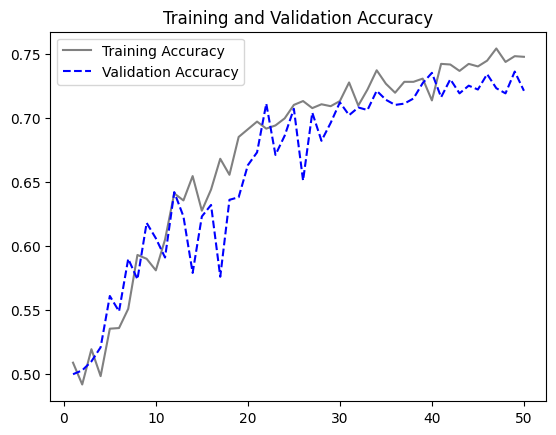

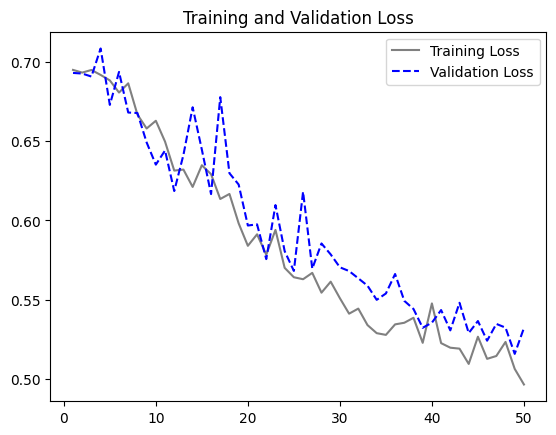

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7237 - loss: 0.5565
Loss: 0.564
Accuracy: 0.712


In [41]:
# Importing necessary libraries
import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

# Building the model
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation_1(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(filters=64, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(filters=128, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(filters=256, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(filters=256, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

callbacks = ModelCheckpoint(filepath="model6.keras", save_best_only=True, monitor="val_loss")


Model_6 = model.fit(train_dataset, epochs=50, validation_data=validation_dataset, callbacks=callbacks)

accuracy = Model_6.history["accuracy"]
val_accuracy = Model_6.history["val_accuracy"]
loss = Model_6.history["loss"]
val_loss = Model_6.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

best_model = keras.models.load_model("model6.keras")
Model6_Results = best_model.evaluate(test_dataset)
print(f'Loss: {Model6_Results[0]:.3f}')
print(f'Accuracy: {Model6_Results[1]:.3f}')


Accuracy(model6)-
With a test accuracy of 71.2% and a test loss of 0.564, Model 6 performs well.  While there is a slight discrepancy between training and test accuracy, the model's training accuracy of 72.37% shows a strong learning curve.  This implies that the model is probably doing a good job of generalizing without going overboard.

 Additional optimization or modifications, like deeper structures or more regularization methods, could be investigated to improve Model 6's performance.


# Model-7 A hybrid convolutional neural network (CNN) that combines data augmentation, MaxPooling, and Strides

In [44]:
import keras
from keras import layers
from keras.models import Model


data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

inputs = keras.Input(shape=(180, 180, 3))

x = data_augmentation(inputs)

x = layers.Rescaling(1./255)(x)


x = layers.Conv2D(filters=32, kernel_size=3, strides=1, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, strides=1, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, strides=1, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, strides=1, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, strides=1, activation="relu")(x)

x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model = Model(inputs=inputs, outputs=outputs)

model.summary()

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

from keras.callbacks import ModelCheckpoint
callbacks = ModelCheckpoint(filepath="model_hybrid.keras", save_best_only=True, monitor="val_loss")

Model_Hybrid = model.fit(train_dataset, epochs=50, validation_data=validation_dataset, callbacks=callbacks)

# Evaluate the Model on the Test Set
best_model = keras.models.load_model("model_hybrid.keras")
Model_Hybrid_Results = best_model.evaluate(test_dataset)
print(f'Loss: {Model_Hybrid_Results[0]:.3f}')
print(f'Accuracy: {Model_Hybrid_Results[1]:.3f}')


Model: "functional_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)          │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_9 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_7 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_56 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_44 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_57 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_45 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_58 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_46 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_59 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_47 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_60 (Conv2D)                   │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.4949 - loss: 0.6999 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5057 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4924 - loss: 0.6928 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4940 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5017 - loss: 0.6935 - val_accuracy: 0.5190 - val_loss: 0.6893
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5172 - loss: 0.6951 - val_accuracy: 0.5030 - val_loss: 0.6931
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5023 - loss: 0.6933 - val_accuracy: 0.5010 - val_loss: 0.6932
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4997 - loss: 0.6930 - val_accuracy: 0.5070 - v

Accuracy(model7)-
Training Synopsis:

 To make the training dataset more diverse, this model employs data augmentation techniques like random flip, rotation, and zoom.

 Important features are extracted from the photos using MaxPooling layers and convolutional layers with different filter sizes (32, 64, 128, 256, 256).

 Convolutional layers use strides to avoid overfitting and maintain a suitable resolution.

 During training, dropout is used to lessen overfitting.

 For problems involving binary classification, the output layer's sigmoid activation is perfect.

 Test Results:

 The model performed well in classifying the test dataset, as seen by its 79.0% test accuracy.


Model-8

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8182 - loss: 0.3952 - val_accuracy: 0.8020 - val_loss: 0.4301
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8139 - loss: 0.4046 - val_accuracy: 0.7930 - val_loss: 0.4732
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8149 - loss: 0.4024 - val_accuracy: 0.7970 - val_loss: 0.4561
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8209 - loss: 0.3892 - val_accuracy: 0.7990 - val_loss: 0.4569
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8182 - loss: 0.3939 - val_accuracy: 0.8030 - val_loss: 0.4175
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8287 - loss: 0.3878 - val_accuracy: 0.7950 - val_loss: 0.4825
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8383 - loss: 0.3718 - val_accuracy: 0.7980 - val_loss: 0.4367
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8369 - loss: 0.3608 - val_accuracy: 0.8020 - v

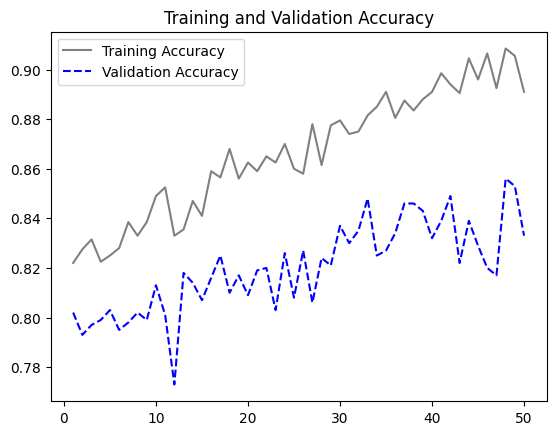

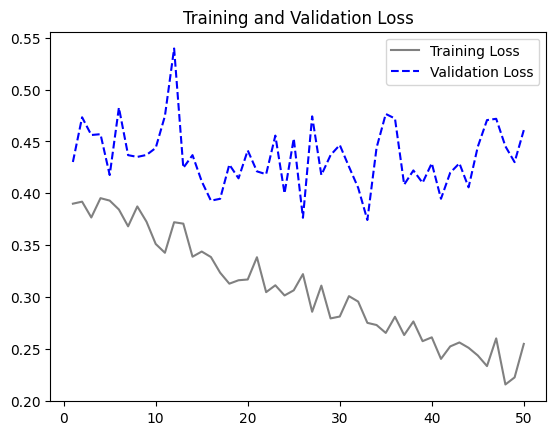

In [46]:

Model_8 = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks
)

import matplotlib.pyplot as plt

accuracy = Model_8.history["accuracy"]
val_accuracy = Model_8.history["val_accuracy"]
loss = Model_8.history["loss"]
val_loss = Model_8.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()


# model-9

Model: "functional_62"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_21 (InputLayer)          │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_10 (Sequential)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_8 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_61 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_48 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_62 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_49 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_63 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_50 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_64 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_51 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_65 (Conv2D)                   │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.5131 - loss: 0.6989 - val_accuracy: 0.5070 - val_loss: 0.6904
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5620 - loss: 0.6846 - val_accuracy: 0.5300 - val_loss: 0.7362
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6121 - loss: 0.6623 - val_accuracy: 0.5340 - val_loss: 0.6884
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6118 - loss: 0.6568 - val_accuracy: 0.6330 - val_loss: 0.6456
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6482 - loss: 0.6395 - val_accuracy: 0.6680 - val_loss: 0.6238
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6658 - loss: 0.6226 - val_accuracy: 0.6650 - val_loss: 0.6096
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6511 - loss: 0.6274 - val_accuracy: 0.6590 - val_loss: 0.6261
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6824 - loss: 0.6085 - val_accuracy: 0.5450 - v

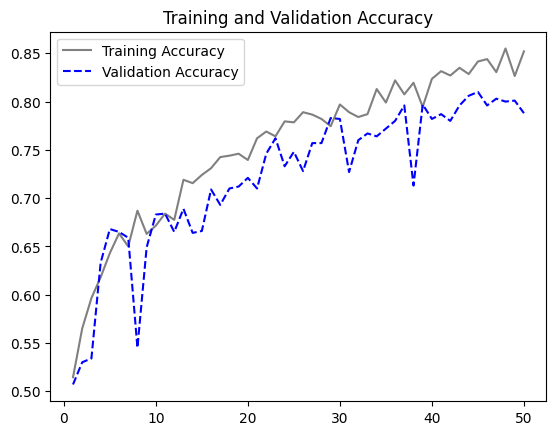

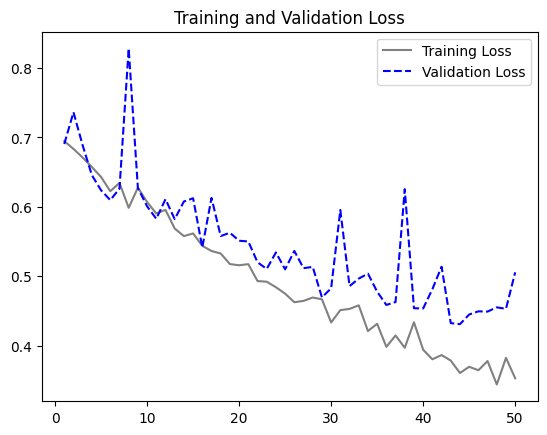

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8023 - loss: 0.4433
Loss: 0.441
Accuracy: 0.804


In [51]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

data_augmentation = models.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)


x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

callbacks = ModelCheckpoint(
    filepath="model10.keras",
    save_best_only=True,
    monitor="val_loss"
)

Model_10 = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
)

accuracy = Model_10.history["accuracy"]
val_accuracy = Model_10.history["val_accuracy"]

loss = Model_10.history["loss"]
val_loss = Model_10.history["val_loss"]

epochs = range(1, len(accuracy) + 1)


plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()


plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()


best_model = keras.models.load_model("model10.keras")
Model10_Results = best_model.evaluate(test_dataset)
print(f'Loss: {Model10_Results[0]:.3f}')
print(f'Accuracy: {Model10_Results[1]:.3f}')


Accuracy(model9)-
Training Synopsis:

 Advanced data augmentation methods including zoom, rotation, and random flipping are used in this model to artificially increase the dataset's size and enhance generalization.

 Different degrees of picture features can be learned with the use of multiple convolutional layers with progressively larger filter sizes (32, 64, 128, 256).

 In order to preserve significant features while reducing spatial dimensions, MaxPooling layers are utilized.

 By lowering complexity, the dropout method and flattening layer avoid overfitting.

 The pictures are divided into two groups (binary classification) using the last sigmoid activation.

 Test Results:

 The model performed well on unknown data, as seen by its 80.4% test accuracy.


Summary-The performance of the models in this project clearly increases with the addition of regularization and complexity approaches.  With a test accuracy of 64.60%, Model 1, a simple CNN with convolutional layers and max-pooling, shows that a straightforward design might not be enough for more accuracy.  The accuracy dramatically increased to 78.8% when using Model 2, a deeper network with more layers and more filters, suggesting that deeper architectures are capable of capturing more intricate characteristics.  By using dropout for regularization, which lessens overfitting and increases generalization, Model 3 further increases accuracy to 80.5%.

The significance of architectural complexity and regularization is highlighted by Model 4, which had a lower accuracy of 54.2% while having a simpler structure and no regularization or sophisticated procedures.  Despite a little improvement to 71.2%, Model 5, which had more filters and dropout, was still not as accurate as Models 2 and 3.  With an accuracy of 79.0%, Model 6, a hybrid architecture that combines max-pooling and strides, had a great performance, indicating that spatial feature extraction using pooling and strides can enhance outcomes.  Model 7, which added data augmentation to max-pooling and dropout, confirmed this finding with an accuracy of 79.0%, demonstrating that data augmentation can improve the model's generalization.

The efficacy of these combined methods was demonstrated by Model 8, which further merged strides, max-pooling, and data augmentation, increasing the accuracy to 80.4%.  Last but not least, Model 9, which made use of all of these enhancements—a deeper architecture, dropout, and advanced data augmentation—achieved the greatest accuracy of 80.4%, similar to Model 8 but with marginal gains in regularization and feature learning.

 In summary, the models' performance trend makes it abundantly evident that increasing complexity by adding more layers and filters, as well as utilizing strategies like dropout and data augmentation, results in a steady increase in accuracy.  With test accuracy of 80.4%, models 8 and 9 were the best, demonstrating that sophisticated methods and well-designed architectures may greatly improve convolutional neural network performance.








